In [214]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import random

In [199]:
def brute(func, limits, eps):
    a, b = limits
    n = int((b - a) / eps)
    iteration = 0
    evaluation = 0

    min_y = float("inf")
    min_x = 0
    
    for k in range(n+1):
        iteration += 1 # iter up
        x = a + k * (b - a) / n
        evaluation += 1
        y = func( x ) # eval up
        
        if y < min_y:
            min_y = y
            min_x = x
        
    return min_x, min_y, iteration, evaluation


def dichotomy(func, limits, eps):
    a, b = limits
    delta = eps / 2
    
    iteration = 0
    evaluation = 0

    while abs(a - b) >= eps:
        
        iteration += 1
        evaluation += 2
        
        median = (a + b) / 2
        x1, x2 = median - delta / 2, median + delta / 2
        
        f1, f2 = func( x1 ), func( x2 )
        
        if f1 <= f2:
            b = x2
        else:
            a = x1
           
    min_x = (a + b) / 2
    min_y = (f1 + f2) / 2
        
    return min_x, min_y, iteration, evaluation


def golden(func, limits, eps):
    a, b = limits
    
    flag = 0
    
    iteration = 0
    evaluation = 0
    
    while abs(a - b) >= eps:
        iteration += 1
        
        delta = (3 - math.sqrt(5)) * (b - a) / 2
        
        if flag == 0:
            evaluation += 2
            x1, x2 = a + delta, b - delta
            f1, f2 = func( x1 ), func( x2 )
        if flag == "x2=x1":
            evaluation += 1
            x1, x2 = a + delta, x1
            f1, f2 = func( x1 ), f1
        if flag == "x1=x2":
            evaluation += 1
            x1, x2 = x2, b - delta
            f1, f2 = f2, func( x2 )

        if f1 <= f2:
            b = x2
            flag = 'x2=x1'
        else:
            a = x1
            flag = 'x1=x2'
           
    min_x = (a + b) / 2
    min_y = (f1 + f2)  / 2
    
    return min_x, min_y, iteration, evaluation

# Task 1

In [200]:
def f1(x):
    return np.power(x, 3)

def f2(x):
    return np.abs(x - 0.2)

def f3(x):
    return x * np.sin(1 / x)

In [201]:
eps = 0.001

br = brute(f1, (0, 1), eps)
br

(0.0, 0.0, 1001, 1001)

In [202]:
eps = 0.001

br = dichotomy(f3, (0.01, 1), eps)
br

(0.22259631347656245, -0.21722919262931228, 11, 22)

In [203]:
eps = 0.001

br = golden(f3, (0.01, 1), eps)
br

(0.22271959361960325, -0.21723265287228982, 15, 16)

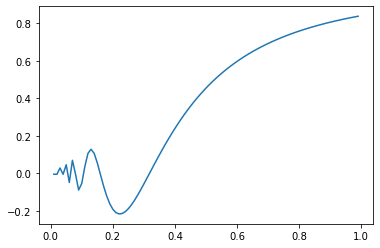

In [160]:
x = np.arange(0.01, 1, 0.01)
plt.plot(x, f3(x))
#plt.plot(len(x) * [0])

# Task 2

In [571]:
random.seed(1000)
a, b = random.random(), random.random()

max_x = 100

x = np.array([k / 100 for k in np.arange(0, max_x + 1, 1)])
y = np.array([a * x[k] + b + random.uniform(0, 1) for k in range(len(x))])

(-0.5, 3.0)

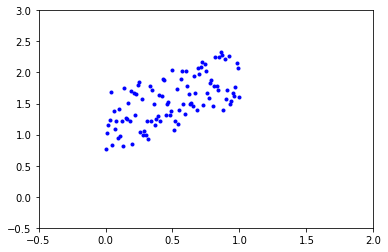

In [572]:
plt.plot(x, y, '.b')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 3)

In [573]:
def f_linear(x, a, b):
    return a * x + b

def f_rational(x, a, b):
    return a / ( 1 + b * x )

def least_squares(ab, func, data):
    a, b = ab
    x, y = data
    return np.sum( (func(x, a, b) - y)**2) / x.shape[0]

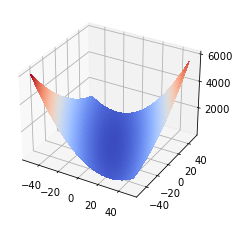

In [574]:
from matplotlib import cm
from sklearn.linear_model import LinearRegression

X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)

Z = np.ones((X.shape[0], Y.shape[0]))
for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        Z[i, j] = least_squares([X[i], Y[j]], f_linear, (x, y))

X, Y = np.meshgrid(X, Y)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [575]:
ab_init = [1, 1]
opt_lin_1 = optimize.minimize(least_squares, ab_init, args=(f_linear, (x, y)), 
                            method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
a, b = opt_lin_1.x

Optimization terminated successfully.
         Current function value: 0.086401
         Iterations: 61
         Function evaluations: 117


In [576]:
ab_init = [1, 1]
opt_rat_1 = optimize.minimize(least_squares, ab_init, args=(f_rational, (x, y)), 
                            method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
a, b = opt_rat_1.x

Optimization terminated successfully.
         Current function value: 0.088972
         Iterations: 75
         Function evaluations: 144


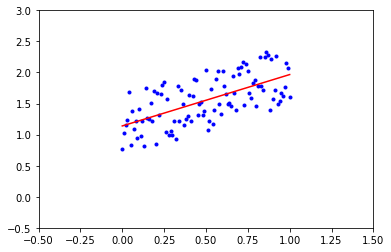

In [581]:
plt.plot(x, y, '.b')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 3)
plt.plot(x, f_linear(x, opt_lin_1.x[0], opt_lin_1.x[1]), 'r')

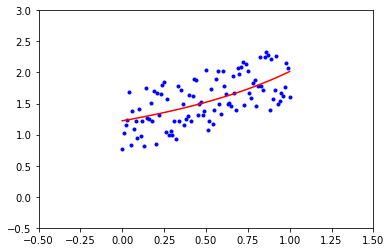

In [582]:
plt.plot(x, y, '.b')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 3)
plt.plot(x, f_rational(x, opt_rat_1.x[0], opt_rat_1.x[1]), 'r')